<a href="https://colab.research.google.com/github/SeokhunEom/DeepLearning-study/blob/main/Section_3_How_to_minimize_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import tensorflow as tf  # For building and training the neural network
import matplotlib.pyplot as plt  # For plotting the loss graph

In [2]:
# Training data: x_train represents the input features and y_train represents the target values
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

In [3]:
# Define a Sequential model in TensorFlow's Keras API
tf.model = tf.keras.Sequential()

In [4]:
# Add a Dense layer with one unit to the model
# 'units=1' means the layer has one neuron
# 'input_dim=1' indicates that the input feature has one dimension
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [5]:
# Define the Stochastic Gradient Descent (SGD) optimizer with a learning rate of 0.1
sgd = tf.keras.optimizers.SGD(lr=0.1)

In [6]:
# Compile the model specifying the loss function and the optimizer
# 'loss='mse'' specifies Mean Squared Error as the loss function
# 'optimizer=sgd' uses the previously defined SGD optimizer for training
tf.model.compile(loss='mse', optimizer=sgd)

In [7]:
# Print a summary of the model to see its architecture
tf.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Train the model using the training data
# 'x_train' is the input data
# 'y_train' is the target data
# 'epochs=100' specifies the number of times the training algorithm will iterate over the entire training dataset
# The fit() method returns a History object which contains the record of training loss values
history = tf.model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 826ms/step - loss: 5.9989
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 4.2429
Epoch 3/100
1/1 [==============================] - 0s 55ms/step - loss: 3.0240
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 2.1778
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 1.5901
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 1.1819
Epoch 7/100
1/1 [==============================] - 0s 40ms/step - loss: 0.8982
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7008
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 0.5634
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 0.4676
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4007
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.3538
Epoch 13/100
1/1 [==============================

In [9]:
# Use the trained model to make predictions on new data
# np.array([5, 4]) is the new input data for prediction
y_predict = tf.model.predict(np.array([5, 4]))
print(y_predict)  # Print the predicted values for the input data [5, 4]

1/1 [==============================] - 0s 236ms/step
[[-3.342414 ]
 [-2.6616492]]


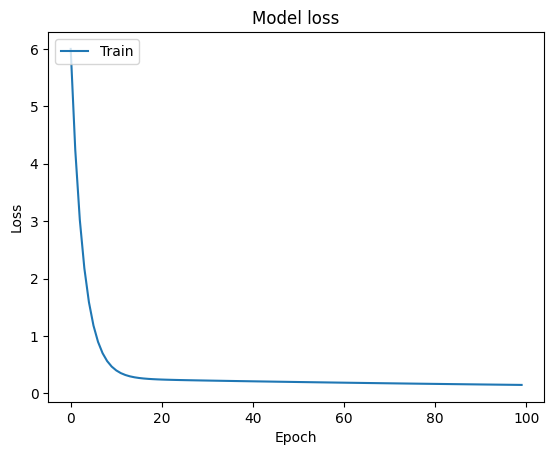

In [10]:
# Plot the training loss over epochs
plt.plot(history.history['loss'])  # Plot the loss values stored in the history object
plt.title('Model loss')  # Set the title of the plot
plt.ylabel('Loss')  # Label the y-axis
plt.xlabel('Epoch')  # Label the x-axis
plt.legend(['Train', 'Test'], loc='upper left')  # Add a legend to the plot
plt.show()  # Display the plot

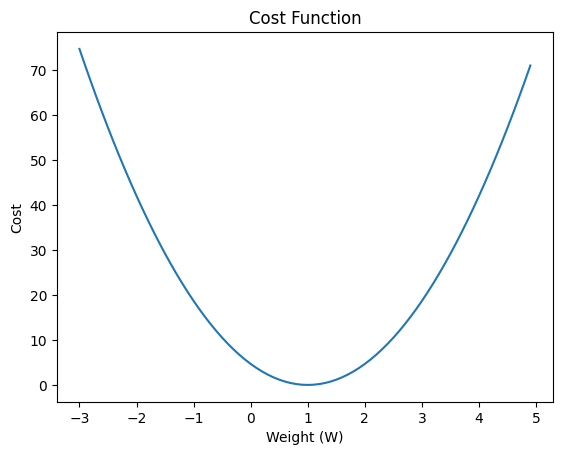

In [11]:
# lab-03-1-minimizing_cost_show_graph.py
# Migrate from TensorFlow 1.x to TensorFlow 2.x by ChatGPT
import tensorflow as tf
import matplotlib.pyplot as plt

# Data
# Define the input data X and Y as constant tensors
# In a real-world scenario, these would be your input features and target values
X = tf.constant([1, 2, 3], dtype=tf.float32)
Y = tf.constant([1, 2, 3], dtype=tf.float32)

# Variables for plotting cost function
# Lists to store the history of weights (W) and corresponding costs for plotting
W_history = []
cost_history = []

# Define the cost function
# This function calculates the cost (mean squared error) for a given weight W
def cost_function(W, X, Y):
    # Hypothesis for linear model X * W
    hypothesis = X * W
    # Calculate the mean squared error between the hypothesis and actual values
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    return cost

# Calculate cost for different values of W
# Loop through a range of W values from -3.0 to 5.0 in steps of 0.1
for i in range(-30, 50):
    # Current weight value
    curr_W = i * 0.1
    # Calculate the current cost for this weight
    # Use .numpy() to get the numerical value of the tensor
    curr_cost = cost_function(curr_W, X, Y).numpy()

    # Append the current weight and its cost to the history lists
    W_history.append(curr_W)
    cost_history.append(curr_cost)

# Plotting the cost function
# This will visualize how the cost changes with different weight values
plt.plot(W_history, cost_history)
plt.xlabel('Weight (W)')  # Label for the x-axis
plt.ylabel('Cost')        # Label for the y-axis
plt.title('Cost Function') # Title of the plot
plt.show() # Display the plot


In [12]:
# lab-03-2-minimizing_cost_gradient_update.py
# Migrate from TensorFlow 1.x to TensorFlow 2.x by ChatGPT
import tensorflow as tf

# Set seed for reproducibility to ensure that the random numbers generated are the same
# every time the program is run
tf.random.set_seed(777)

# Input data
x_data = [1, 2, 3]
y_data = [1, 2, 3]

# Define the weight variable 'W' initialized with a random normal value
# The shape is [1] indicating a single weight value
# tf.Variable is used to create a variable tensor that can be modified
W = tf.Variable(tf.random.normal([1]), name="weight")

# Learning rate for the gradient descent optimizer
learning_rate = 0.1

# Define the training step function which performs a single step of gradient descent
# This function takes the input tensor X and target tensor Y as arguments
def train_step(X, Y):
    with tf.GradientTape() as tape:
        # Compute the hypothesis using the linear model: hypothesis = X * W
        hypothesis = X * W
        # Calculate the cost using the mean squared error (MSE) loss function
        # MSE = mean((hypothesis - Y)^2)
        cost = tf.reduce_mean(tf.square(hypothesis - Y))

    # Use GradientTape to automatically compute the gradient of the cost with respect to W
    gradients = tape.gradient(cost, [W])

    # Update the weight W by subtracting the product of the learning rate and the gradient
    # W.assign_sub(learning_rate * gradients[0]) is equivalent to W = W - learning_rate * gradient
    W.assign_sub(learning_rate * gradients[0])

    # Return the current cost value for tracking
    return cost

# Training loop to perform multiple iterations of gradient descent
for step in range(21):
    # Convert the input data and target data to TensorFlow constant tensors
    # tf.constant is used to create constant tensors that cannot be modified
    X = tf.constant(x_data, dtype=tf.float32)
    Y = tf.constant(y_data, dtype=tf.float32)

    # Execute the training step and get the current cost value
    cost_val = train_step(X, Y).numpy()

    # Get the current value of the weight W
    W_val = W.numpy()

    # Print the step number, current cost value, and current weight value
    # This helps in monitoring the training process
    print(step, cost_val, W_val)


0 0.24547727 [0.98470986]
1 0.0010910089 [0.99898064]
2 4.848853e-06 [0.999932]
3 2.1592422e-08 [0.99999547]
4 9.576221e-11 [0.9999997]
5 4.5119464e-13 [1.]
6 0.0 [1.]
7 0.0 [1.]
8 0.0 [1.]
9 0.0 [1.]
10 0.0 [1.]
11 0.0 [1.]
12 0.0 [1.]
13 0.0 [1.]
14 0.0 [1.]
15 0.0 [1.]
16 0.0 [1.]
17 0.0 [1.]
18 0.0 [1.]
19 0.0 [1.]
20 0.0 [1.]


In [13]:
# lab-03-3-minimizing_cost_tf_optimizer.py
# Migrate from TensorFlow 1.x to TensorFlow 2.x by ChatGPT
import tensorflow as tf

# Input data
# X and Y represent the input features and the target values, respectively
X = tf.constant([1, 2, 3], dtype=tf.float32)
Y = tf.constant([1, 2, 3], dtype=tf.float32)

# Initialize the weight variable with an incorrect initial value
# tf.Variable is used to create a variable tensor that can be modified during training
W = tf.Variable(5.0, dtype=tf.float32)

# Define the linear model hypothesis
# hypothesis = X * W
hypothesis = X * W

# Define the cost/loss function using mean squared error
# cost = mean((hypothesis - Y)^2)
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Define the optimizer
# GradientDescentOptimizer is replaced by tf.keras.optimizers.SGD in TensorFlow 2.x
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Define the training step function which performs a single step of gradient descent
def train_step():
    with tf.GradientTape() as tape:
        # Recompute the hypothesis using the current value of W
        hypothesis = X * W
        # Recompute the cost with the current hypothesis and target values
        cost = tf.reduce_mean(tf.square(hypothesis - Y))

    # Calculate the gradients of the cost with respect to W
    gradients = tape.gradient(cost, [W])

    # Apply the gradients to update W using the optimizer
    optimizer.apply_gradients(zip(gradients, [W]))

    return W

# Training loop to perform multiple iterations of gradient descent
for step in range(101):
    # Execute the training step to update W
    W_val = train_step().numpy()

    # Print the current step number and the value of W
    # This helps in monitoring the training process
    print(step, W_val)


0 1.2666664
1 1.0177778
2 1.0011852
3 1.000079
4 1.0000052
5 1.0000004
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0
100 1.0


In [14]:
# lab-03-X-minimizing_cost_tf_gradient.py
# Migrate from TensorFlow 1.x to TensorFlow 2.x by ChatGPT
# This is optional
import tensorflow as tf

# Input data
# X and Y represent the input features and the target values, respectively
X = tf.constant([1, 2, 3], dtype=tf.float32)
Y = tf.constant([1, 2, 3], dtype=tf.float32)

# Initialize the weight variable with an incorrect initial value
# tf.Variable is used to create a variable tensor that can be modified during training
W = tf.Variable(5.0, dtype=tf.float32)

# Define the optimizer
# GradientDescentOptimizer is replaced by tf.keras.optimizers.SGD in TensorFlow 2.x
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Define the training step function which performs a single step of gradient descent
@tf.function
def train_step(X, Y):
    with tf.GradientTape() as tape:
        # Compute the hypothesis using the linear model: hypothesis = X * W
        hypothesis = X * W
        # Calculate the cost using the mean squared error (MSE) loss function
        # MSE = mean((hypothesis - Y)^2)
        cost = tf.reduce_mean(tf.square(hypothesis - Y))

    # Calculate the gradients of the cost with respect to W
    gradients = tape.gradient(cost, [W])

    # Apply the gradients to update W using the optimizer
    optimizer.apply_gradients(zip(gradients, [W]))

    # Calculate the manual gradient for comparison
    manual_gradient = tf.reduce_mean((W * X - Y) * X) * 2

    return manual_gradient, gradients, cost

# Training loop to perform multiple iterations of gradient descent
for step in range(101):
    # Execute the training step to update W and get the gradients and cost
    manual_gradient_val, gradients_val, cost_val = train_step(X, Y)

    # Print the current step number, manual gradient, and gradient values
    # This helps in monitoring the training process
    print(f"Step {step}: Manual Gradient = {manual_gradient_val.numpy()}, Gradients = {[grad.numpy() for grad in gradients_val]}, Cost = {cost_val.numpy()}")


Step 0: Manual Gradient = 33.8488883972168, Gradients = [37.333336], Cost = 74.66666412353516
Step 1: Manual Gradient = 30.68965721130371, Gradients = [33.84889], Cost = 61.37931442260742
Step 2: Manual Gradient = 27.825286865234375, Gradients = [30.689657], Cost = 50.45651626586914
Step 3: Manual Gradient = 25.228261947631836, Gradients = [27.825287], Cost = 41.47749328613281
Step 4: Manual Gradient = 22.873620986938477, Gradients = [25.228264], Cost = 34.09634780883789
Step 5: Manual Gradient = 20.738752365112305, Gradients = [22.873623], Cost = 28.028711318969727
Step 6: Manual Gradient = 18.803136825561523, Gradients = [20.738752], Cost = 23.040847778320312
Step 7: Manual Gradient = 17.048175811767578, Gradients = [18.803137], Cost = 18.940603256225586
Step 8: Manual Gradient = 15.457013130187988, Gradients = [17.048176], Cost = 15.570015907287598
Step 9: Manual Gradient = 14.014359474182129, Gradients = [15.457014], Cost = 12.799246788024902
Step 10: Manual Gradient = 12.706352233